In [1]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers # helper functions
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn

In [2]:
#sess = tf.InteractiveSession()

ann_model = tf.keras.models.load_model("titanic_ann.h5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
data = train_df.append(test_df)

In [4]:
train_pre = pd.get_dummies(train_df, drop_first=False, columns=["Pclass", "Sex", "Embarked"])

result1 = train_pre.copy()
for feature_name in ['Age', 'Fare', 'Relatives']:
    max_value = data[feature_name].max()
    min_value = data[feature_name].min()
    result1[feature_name] = (
        train_pre[feature_name] - min_value) / (max_value - min_value)
train_pre = result1

test_pre = pd.get_dummies(test_df, drop_first=False, columns=["Pclass", "Sex", "Embarked"])

result2 = test_pre.copy()
for feature_name in ['Age', 'Fare', 'Relatives']:
    max_value = data[feature_name].max()
    min_value = data[feature_name].min()
    result2[feature_name] = (
        test_pre[feature_name] - min_value) / (max_value - min_value)
test_pre = result2

In [5]:
X_train = train_pre.loc[:, train_pre.columns != 'class']
y_train = train_pre.loc[:, train_pre.columns == 'class']
X_test = test_pre.loc[:, test_pre.columns != 'class']
y_test = test_pre.loc[:, train_pre.columns == 'class']

In [7]:
print(tree_train)

Pclass     Sex   Age      Fare     Embarked  Relatives
0     First    Male  27.0  211.5000    Cherbourg          2
1     First  Female  23.0  263.0000  Southampton          5
2     Third    Male  23.5    7.2292    Cherbourg          0
3    Second  Female  17.0   12.0000    Cherbourg          0
4     First  Female  22.0  151.5500  Southampton          0
..      ...     ...   ...       ...          ...        ...
564   First    Male  36.0   26.2875  Southampton          0
565   Third    Male  21.0    7.2500  Southampton          0
566   Third    Male  36.0    0.0000  Southampton          0
567   Third    Male  19.0    0.0000  Southampton          0
568   Third    Male  25.0    7.0500  Southampton          0

[569 rows x 6 columns]


In [6]:
predictions_train = ann_model.predict_classes(X_train)
predictions_test = ann_model.predict_classes(X_test)
#print(ann_model.predict_classes(X_test))

tree_train = train_df.loc[:, train_df.columns != 'class']
#tree_train['class'] = predictions_train

tree_test = test_df.loc[:, test_df.columns != 'class']
#tree_test['class'] = predictions_test


In [9]:
tree_train['Sex'] = tree_train['Sex'].apply({'Male':0, 'Female':1}.get)
tree_train['Pclass'] = tree_train['Pclass'].apply({'First':1, 'Second':2, 'Third': 3}.get)
tree_train['Embarked'] = tree_train['Embarked'].apply({'Southampton':0, 'Cherbourg':1, 'Queenstown':2}.get)

tree_test['Sex'] = tree_test['Sex'].apply({'Male':0, 'Female':1}.get)
tree_test['Pclass'] = tree_test['Pclass'].apply({'First':1, 'Second':2, 'Third': 3}.get)
tree_test['Embarked'] = tree_test['Embarked'].apply({'Southampton':0, 'Cherbourg':1, 'Queenstown':2}.get)
print(tree_train)
print(tree_test)


Pclass  Sex   Age      Fare  Embarked  Relatives
0         1    0  27.0  211.5000         1          2
1         1    1  23.0  263.0000         0          5
2         3    0  23.5    7.2292         1          0
3         2    1  17.0   12.0000         1          0
4         1    1  22.0  151.5500         0          0
..      ...  ...   ...       ...       ...        ...
564       1    0  36.0   26.2875         0          0
565       3    0  21.0    7.2500         0          0
566       3    0  36.0    0.0000         0          0
567       3    0  19.0    0.0000         0          0
568       3    0  25.0    7.0500         0          0

[569 rows x 6 columns]
     Pclass  Sex   Age      Fare  Embarked  Relatives
0         3    0  24.0    9.5000         0          0
1         1    0  52.0   79.6500         0          2
2         1    1  35.0  135.6333         0          0
3         3    0  31.0    7.9250         0          0
4         2    0  19.0   10.5000         0          0
..      .

In [10]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(tree_train, predictions_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
print(metrics.accuracy_score(predictions_test, tree.predict(tree_test)))

0.9230769230769231


[Text(181.35000000000002, 190.26, 'X[1] <= 0.5\nentropy = 0.427\nsamples = 569\nvalue = [393, 176]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 35.077\nentropy = 0.129\nsamples = 361\nvalue = [336, 25]'),
 Text(55.800000000000004, 81.53999999999999, 'X[2] <= 3.5\nentropy = 0.053\nsamples = 294\nvalue = [286, 8]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.021\nsamples = 285\nvalue = [282, 3]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 28.5\nentropy = 0.379\nsamples = 67\nvalue = [50, 17]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.5\nsamples = 32\nvalue = [16, 16]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.5\nentropy = 0.398\nsamples = 208\nvalue = [57, 151]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 126\nvalue = [0, 126]'),
 Text(279.0, 81.53999999999999, 'X[2] <= 19

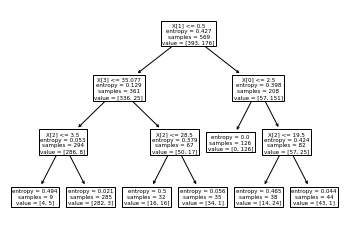

In [12]:
sklearn.tree.plot_tree(tree)